In [1]:
import numpy as np 
import tensorflow as tf
import re 
import nltk.corpus
import nltk.stem
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
corpus_raw ='He is the king . The king is royal . She is the royal queen ' 

In [54]:
corpus_raw=corpus_raw.lower()

In [55]:
words=[]
for word in corpus_raw.split():
    if word !='.' :
        words.append(word)
        

In [56]:
print(words)

['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']


In [57]:
words=set(words)
word2int={}
int2word={}
vocab_size=len(words)  # total number of unique words

In [58]:
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

In [59]:
for i,word in enumerate(words):
    word2int[word]=i
    int2word[i]=word

In [60]:
print(word2int['king'])
print(int2word[0])

0
king


In [61]:
# raw sentences 
raw_sentences=corpus_raw.split('.')
sentences=[]
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [62]:
WINDOW_SIZE=2

In [63]:
data=[]
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index-WINDOW_SIZE,0):min(word_index+WINDOW_SIZE,len(sentence))+1]:
            if nb_word!=word:
                data.append([word,nb_word])

In [73]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [65]:
def to_one_hot(data_point_index,vocab_size):
    temp=np.zeros(vocab_size)
    temp[data_point_index]=1
    return temp


In [66]:
X_train=[]
Y_train=[]
for data_word in data:
    X_train.append(to_one_hot(word2int[data_word[0]],vocab_size))
    Y_train.append(to_one_hot(word2int[data_word[1]],vocab_size)) 

X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

In [72]:
X_train

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,

In [67]:
# making placeholders 
x=tf.placeholder(tf.float32,shape=(None,vocab_size))
y_label=tf.placeholder(tf.float32,shape=(None,vocab_size))

In [102]:
EMBEDDING_DIM=5  # matrix embedding 

W1=tf.Variable(tf.random_normal([vocab_size,EMBEDDING_DIM]))

b1=tf.Variable(tf.random_normal([EMBEDDING_DIM]))  # bias

hidden_representation=tf.add(tf.matmul(x,W1),b1)

In [103]:
W2=tf.Variable(tf.random_normal([EMBEDDING_DIM,vocab_size]))

b2=tf.Variable(tf.random_normal([vocab_size]))

prediction=tf.nn.softmax(tf.add(tf.matmul(hidden_representation,W2),b2))
#loss function 
cross_entropy_loss=tf.reduce_mean(-tf.reduce_sum(y_label*tf.log(prediction),reduction_indices=[1]))

train_step=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)



In [104]:
# run model 
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [105]:
n_iters=1000

for _ in range(n_iters):
    sess.run(train_step,feed_dict={x:X_train,y_label:Y_train})
    print('loss: ',sess.run(cross_entropy_loss,feed_dict={x:X_train, y_label:Y_train}))



('loss: ', 4.6640916)
('loss: ', 4.0712118)
('loss: ', 3.6306162)
('loss: ', 3.3011224)
('loss: ', 3.0626962)
('loss: ', 2.8934097)
('loss: ', 2.7726676)
('loss: ', 2.684217)
('loss: ', 2.6166742)
('loss: ', 2.5627804)
('loss: ', 2.5180902)
('loss: ', 2.4798584)
('loss: ', 2.4463329)
('loss: ', 2.4163475)
('loss: ', 2.3890967)
('loss: ', 2.3640049)
('loss: ', 2.340651)
('loss: ', 2.3187203)
('loss: ', 2.2979741)
('loss: ', 2.2782269)
('loss: ', 2.2593355)
('loss: ', 2.2411864)
('loss: ', 2.2236888)
('loss: ', 2.2067709)
('loss: ', 2.1903727)
('loss: ', 2.1744463)
('loss: ', 2.1589515)
('loss: ', 2.1438549)
('loss: ', 2.1291289)
('loss: ', 2.1147494)
('loss: ', 2.1006973)
('loss: ', 2.0869546)
('loss: ', 2.0735066)
('loss: ', 2.0603406)
('loss: ', 2.0474453)
('loss: ', 2.034811)
('loss: ', 2.022429)
('loss: ', 2.0102923)
('loss: ', 1.9983935)
('loss: ', 1.9867274)
('loss: ', 1.9752884)
('loss: ', 1.9640727)
('loss: ', 1.9530759)
('loss: ', 1.9422944)
('loss: ', 1.9317259)
('loss: ', 1.9

('loss: ', 1.3619587)
('loss: ', 1.3618095)
('loss: ', 1.361661)
('loss: ', 1.3615134)
('loss: ', 1.3613667)
('loss: ', 1.3612208)
('loss: ', 1.3610761)
('loss: ', 1.3609324)
('loss: ', 1.3607892)
('loss: ', 1.3606468)
('loss: ', 1.3605055)
('loss: ', 1.3603649)
('loss: ', 1.3602253)
('loss: ', 1.3600867)
('loss: ', 1.3599485)
('loss: ', 1.3598114)
('loss: ', 1.359675)
('loss: ', 1.3595395)
('loss: ', 1.3594049)
('loss: ', 1.359271)
('loss: ', 1.3591381)
('loss: ', 1.3590057)
('loss: ', 1.3588742)
('loss: ', 1.3587433)
('loss: ', 1.3586133)
('loss: ', 1.358484)
('loss: ', 1.3583556)
('loss: ', 1.358228)
('loss: ', 1.3581009)
('loss: ', 1.3579748)
('loss: ', 1.3578492)
('loss: ', 1.3577244)
('loss: ', 1.3576003)
('loss: ', 1.3574769)
('loss: ', 1.3573543)
('loss: ', 1.3572323)
('loss: ', 1.357111)
('loss: ', 1.3569903)
('loss: ', 1.3568705)
('loss: ', 1.3567514)
('loss: ', 1.3566328)
('loss: ', 1.3565149)
('loss: ', 1.3563976)
('loss: ', 1.356281)
('loss: ', 1.3561651)
('loss: ', 1.3560

('loss: ', 1.3324749)
('loss: ', 1.3324504)
('loss: ', 1.3324262)
('loss: ', 1.332402)
('loss: ', 1.3323778)
('loss: ', 1.3323536)
('loss: ', 1.3323295)
('loss: ', 1.3323057)
('loss: ', 1.3322818)
('loss: ', 1.3322579)
('loss: ', 1.3322343)
('loss: ', 1.3322105)
('loss: ', 1.3321867)
('loss: ', 1.3321633)
('loss: ', 1.3321398)
('loss: ', 1.3321162)
('loss: ', 1.332093)
('loss: ', 1.3320698)
('loss: ', 1.3320465)
('loss: ', 1.3320235)
('loss: ', 1.3320003)
('loss: ', 1.3319772)
('loss: ', 1.3319545)
('loss: ', 1.3319316)
('loss: ', 1.3319088)
('loss: ', 1.3318861)
('loss: ', 1.3318634)
('loss: ', 1.3318408)
('loss: ', 1.3318183)
('loss: ', 1.3317958)


In [107]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.70162368  1.02727377  0.67414278 -0.40907124 -0.04813511]
 [ 1.31534505 -0.90174574 -2.54694676  0.80336714 -0.21204521]
 [-2.11110806  0.62583035  0.45005652  1.22712338  1.63690758]
 [ 0.57387668  0.59011334 -0.83701569 -1.69171    -2.46078253]
 [-0.03103738  2.646415   -0.02879368 -1.72299635 -1.8322705 ]
 [-0.6493063  -2.23745131  1.01971734  0.62207824 -1.47380924]
 [ 0.29385772  1.01321876  1.01853347 -1.94049799  2.31425905]]
----------
[ 0.25973171  1.79872894  0.31376514  0.14544843  0.24548735]
----------


In [108]:
vectors=sess.run(W1+b1)
print(vectors)

[[-0.44189197  2.8260026   0.98790789 -0.26362282  0.19735223]
 [ 1.57507682  0.89698321 -2.23318172  0.94881558  0.03344214]
 [-1.8513763   2.42455935  0.76382166  1.37257183  1.88239491]
 [ 0.83360839  2.38884234 -0.52325058 -1.54626155 -2.21529508]
 [ 0.22869433  4.4451437   0.28497148 -1.57754791 -1.58678317]
 [-0.38957459 -0.43872237  1.3334825   0.76752669 -1.22832191]
 [ 0.55358946  2.81194782  1.33229864 -1.79504955  2.5597465 ]]


In [109]:
print(vectors[word2int['king']])

[-0.44189197  2.8260026   0.98790789 -0.26362282  0.19735223]


In [110]:
def euclid_dist(vect1,vect2):
    return np.sqrt(np.sum((vect1-vect2)**2))
def find_closest(word_index,vectors):
    min_dist=1000
    min_index=-1
    query_vector=vectors[word_index]
    for index,vector in enumerate(vectors):
        if euclid_dist(vector,query_vector)< min_dist and not np.array_equal(vector,query_vector):
            min_dist=euclid_dist(vector,query_vector)
            min_index=index
    return min_index 


In [112]:
print(int2word[find_closest(word2int['king'], vectors)])

queen


[[ 0.60416228  0.79686135]
 [ 0.94764328 -0.31933063]
 [-0.56901824 -0.82232487]
 [-0.50752604 -0.8616364 ]
 [ 0.25788736 -0.96617496]
 [-0.59571677  0.80319452]
 [-0.99601877 -0.08914335]]
set(['king', 'is', 'queen', 'royal', 'she', 'the', 'he'])
('king', 0.79686135)
('is', -0.31933063)
('queen', -0.82232487)
('royal', -0.8616364)
('she', -0.96617496)
('the', 0.80319452)
('he', -0.089143351)


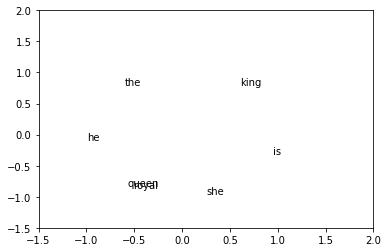

In [123]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.axis([-1.5,2,-1.5,2])
plt.show()